In [9]:
from numpy import * 

def step(x):
    if x>=0:
        return 1
    else:
        return 0

step(0)

1

In [2]:
import numpy as np

def sigmoid(x):
    return 1/np.exp(-x)

sigmoid(3)

20.085536923187668

In [4]:
from numpy import * 

def tanh(x):
    return exp(x)-exp(-x)/exp(x)+exp(x)

tanh(2)

14.759796558972567

In [6]:
from numpy import * 

def relu(x):
    return max(0,x)

relu(-4)

0

In [ ]:
from numpy import * 

def leaky_relu(x):
    return 0.01*x

tanh(2)

In [2]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class SimpleNN:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)

    def feedforward(self, X):
        self.hidden_layer_activation = np.dot(X, self.weights_input_hidden)
        self.hidden_layer_output = sigmoid(self.hidden_layer_activation)

        self.output_layer_activation = np.dot(self.hidden_layer_output, self.weights_hidden_output)
        self.output = sigmoid(self.output_layer_activation)
        return self.output

    def backpropagate(self, X, y, learning_rate):
        output_error = y - self.output
        output_delta = output_error * sigmoid_derivative(self.output)

        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_layer_output)

        self.weights_hidden_output += self.hidden_layer_output.T.dot(output_delta) * learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for _ in range(epochs):
            self.feedforward(X)
            self.backpropagate(X, y, learning_rate)
if __name__ == "__main__":
    X = np.array([[0, 0, 0],
                  [0, 0, 1],
                  [0, 1, 0],
                  [0, 1, 1],
                  [1, 0, 0],
                  [1, 0, 1],
                  [1, 1, 0],
                  [1, 1, 1]])
    y = np.array([[0], [1], [1], [0], [1], [0], [0], [1]])
    nn = SimpleNN(input_size=3, hidden_size=3, output_size=1)
    nn.train(X, y, epochs=10000, learning_rate=0.1)
    print("Enter three inputs (0 or 1):")
    user_input = input("Input (comma-separated): ")
    input_values = np.array([float(i) for i in user_input.split(',')]).reshape(1, 3)
    if input_values.shape[1] != 3 or any((i not in [0, 1]) for i in input_values.flatten()):
        print("Please enter exactly three inputs (0 or 1).")
    else:
        output = nn.feedforward(input_values)
        print("Output:", output[0][0])


Enter three inputs (0 or 1):
Input (comma-separated): 0,1,0
Output: 0.5008162964195191


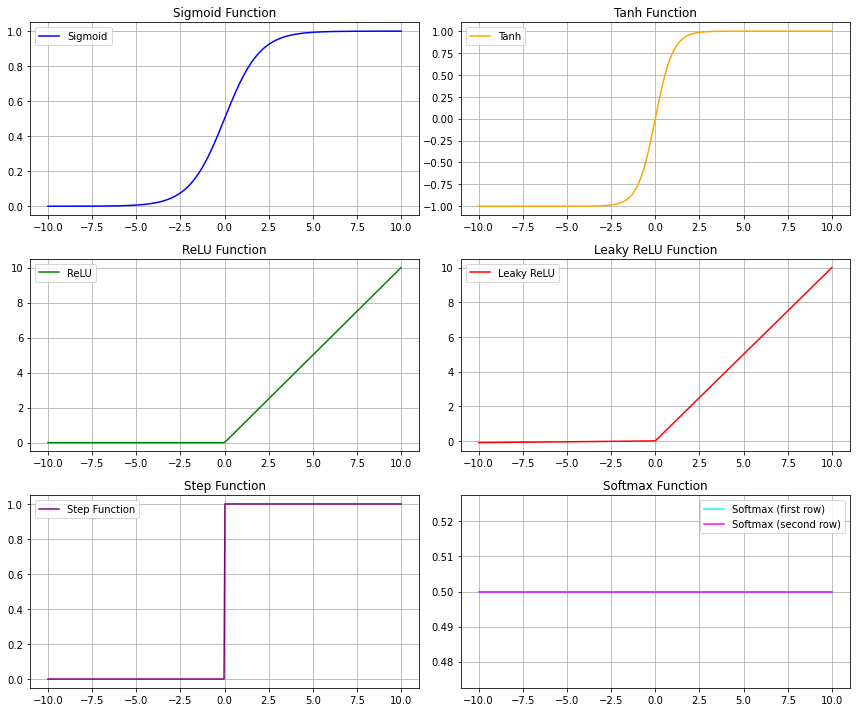

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def step_function(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    exp_x = np.exp(x - np.max(x))  # for numerical stability
    return exp_x / exp_x.sum(axis=0)

x = np.linspace(-10, 10, 400)

sigmoid_vals = sigmoid(x)
tanh_vals = tanh(x)
relu_vals = relu(x)
leaky_relu_vals = leaky_relu(x)
step_vals = step_function(x)

softmax_vals = softmax(np.vstack([x, x]))

plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.plot(x, sigmoid_vals, label='Sigmoid', color='blue')
plt.title('Sigmoid Function')
plt.grid()
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(x, tanh_vals, label='Tanh', color='orange')
plt.title('Tanh Function')
plt.grid()
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(x, relu_vals, label='ReLU', color='green')
plt.title('ReLU Function')
plt.grid()
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(x, leaky_relu_vals, label='Leaky ReLU', color='red')
plt.title('Leaky ReLU Function')
plt.grid()
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(x, step_vals, label='Step Function', color='purple')
plt.title('Step Function')
plt.grid()
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(x, softmax_vals[0], label='Softmax (first row)', color='cyan')
plt.plot(x, softmax_vals[1], label='Softmax (second row)', color='magenta')
plt.title('Softmax Function')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
